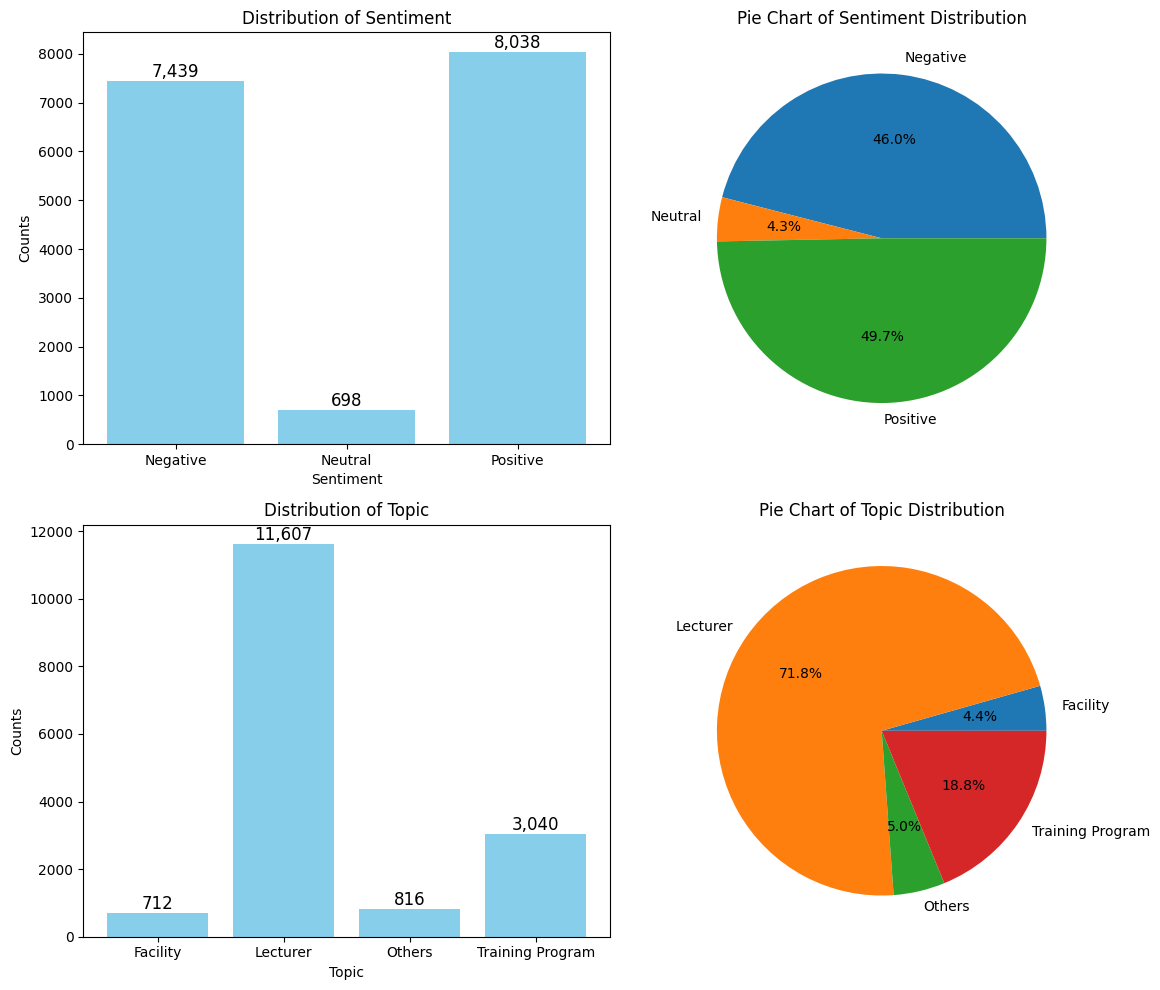

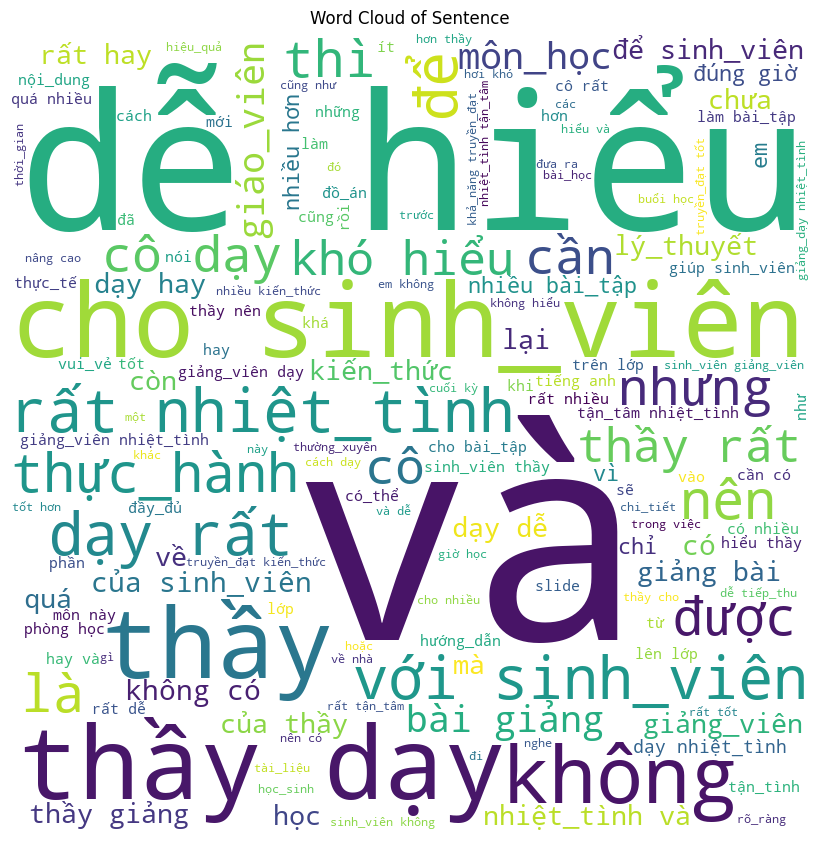

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def filter_and_plot(dataframe, sentiment=None, topic=None):
    global filtered_df
    if sentiment is not None or topic is not None:
        filtered_df = filter_sentences(dataframe, sentiment, topic)
        #yield filtered_df
        # print("Filtered DataFrame:")
        # print(filtered_df)
        
        if not filtered_df.empty:
            # Export filtered data to a CSV file
            fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
            plot_distribution(filtered_df, 'sentiment', axes[0, 0], 'Sentiment')
            plot_distribution(filtered_df, 'topic', axes[1, 0], 'Topic')  
            plot_pie_chart(filtered_df, 'sentiment', axes[0, 1], 'Sentiment')
            plot_pie_chart(filtered_df, 'topic', axes[1, 1], 'Topic')
    
            plt.tight_layout()
            plt.show()
    else:
        print("No filtering applied.")

def filter_sentences(dataframe, sentiment=None, topic=None):
    """
    Filter sentences based on specified sentiment and topic criteria.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        sentiment (str or None): Sentiment value to filter by ('negative', 'neutral', 'positive') or None to ignore.
        topic (str or None): Topic value to filter by ('lecture', 'curriculum', 'facility', 'other') or None to ignore.
        
    Returns:
        pd.DataFrame: Filtered DataFrame based on the specified criteria.
    """
    if sentiment is not None:
        sentiment_mapping_inverse = {v: k for k, v in sentiment_mapping.items()}
        sentiment_idx = sentiment_mapping_inverse.get(sentiment)
        if sentiment_idx is not None:
            dataframe = dataframe[dataframe['sentiment'] == sentiment_idx]
    
    if topic is not None:
        topic_mapping_inverse = {v: k for k, v in topic_mapping.items()}
        topic_idx = topic_mapping_inverse.get(topic)
        if topic_idx is not None:
            dataframe = dataframe[dataframe['topic'] == topic_idx]
    
    return dataframe

sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
topic_mapping = {0: 'Lecturer', 1: 'Training Program', 2: 'Facility', 3: 'Others'}

def plot_distribution(dataframe, column, ax, label):

    counts = dataframe[column].map(sentiment_mapping if column=='sentiment' else topic_mapping).value_counts().sort_index()
  
    ax.bar(counts.index, counts.values, color='skyblue')
    ax.set_xlabel(label)
    ax.set_ylabel('Counts')
    ax.set_title('Distribution of {}'.format(label))
  
    ax.set_xticks(counts.index)
    ax.set_xticklabels(counts.index.tolist())

    # Only annotate the counts if there are more than one value
    if len(counts) > 1:
        for i, count in enumerate(counts.values):
            ax.annotate('{:,}'.format(count), xy=(counts.index[i], count), ha='center', va='bottom', size='12')

def plot_pie_chart(dataframe, column, ax, label):

    counts = dataframe[column].map(sentiment_mapping if column=='sentiment' else topic_mapping).value_counts().sort_index()
  
    labels = counts.index.tolist()

    # Vẽ biểu đồ với counts và labels mới 
    ax.pie(counts, labels=labels, autopct='%1.1f%%')

    ax.set_title('Pie Chart of {} Distribution'.format(label))

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv(r'_1_2_segmented_data.csv')

# Gọi hàm filter_and_plot để lọc, vẽ biểu đồ và xuất dữ liệu lọc
filter_and_plot(df, None, "Lecturer")


def plot_wordcloud(dataframe = filtered_df, column = 'sentence'):
    """
    Plot a Word Cloud based on the specified column's text data.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name for which to plot the Word Cloud.
    """
    text_data = ' '.join(dataframe[column])
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(text_data)

    plt.figure(figsize=(12, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('Word Cloud of {}'.format(column.capitalize()))
    plt.show()

# Example usage of the plot_wordcloud function
# Replace 'sentence' with the actual column name containing text data
plot_wordcloud(column='sentence')  # Đảm bảo rằng bạn đã đặt tên cột chứa dữ liệu văn bản thích hợp
